In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set Seaborn Style
sns.set(style="whitegrid")

In [4]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Check Missing Values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
# Handling Missing Data
# Fill 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
# Fill 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)
# Drop 'Cabin' column (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

<ipython-input-9-c4d892c21122>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
<ipython-input-9-c4d892c21122>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [10]:
# Confirm no missing data
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


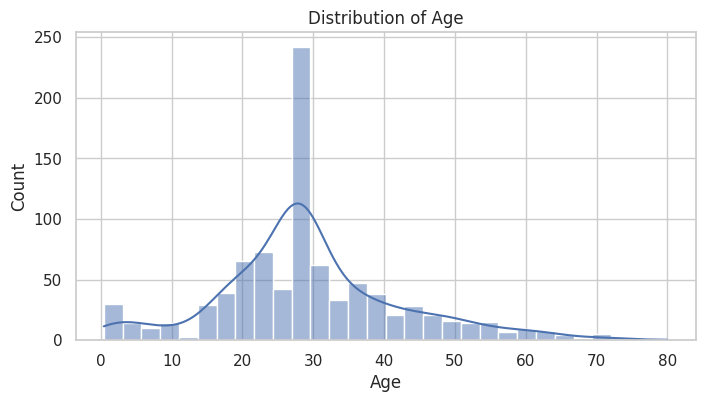

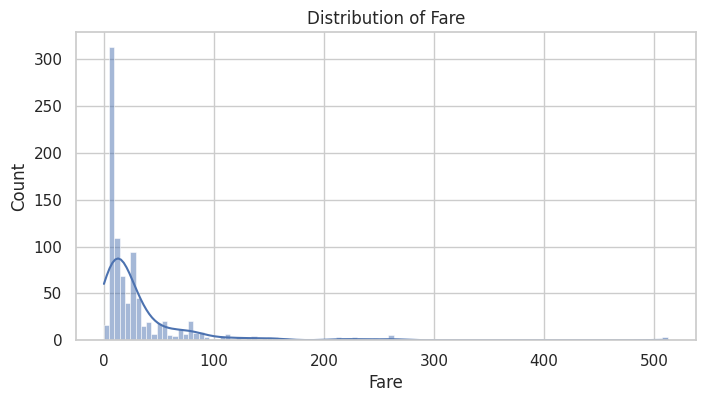

In [11]:
# Univariate Analysis
## Numerical Features
numerical_cols = ['Age', 'Fare']
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

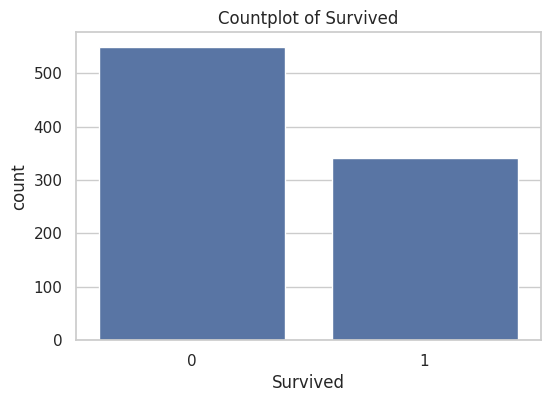

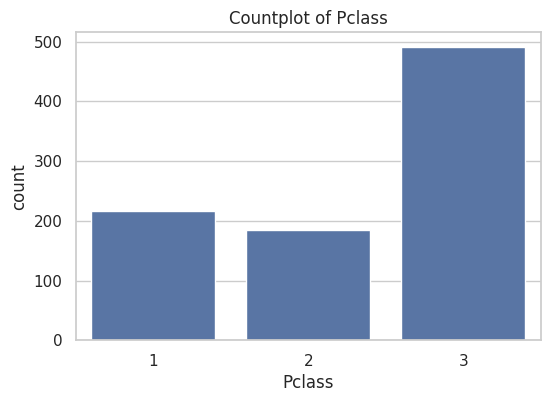

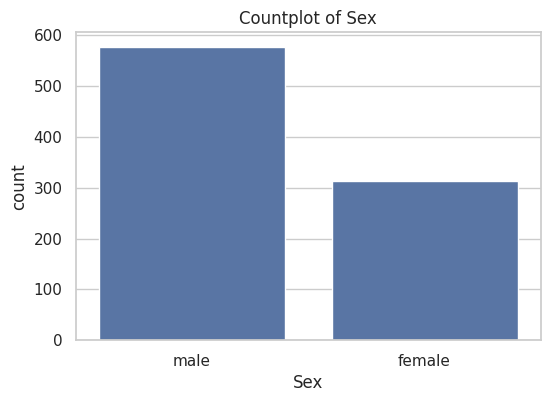

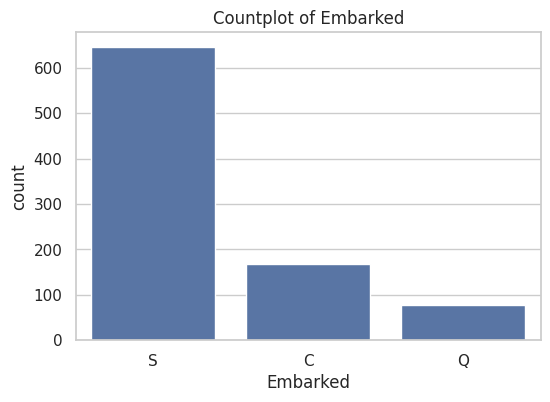

In [12]:
## Categorical Features
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.show()

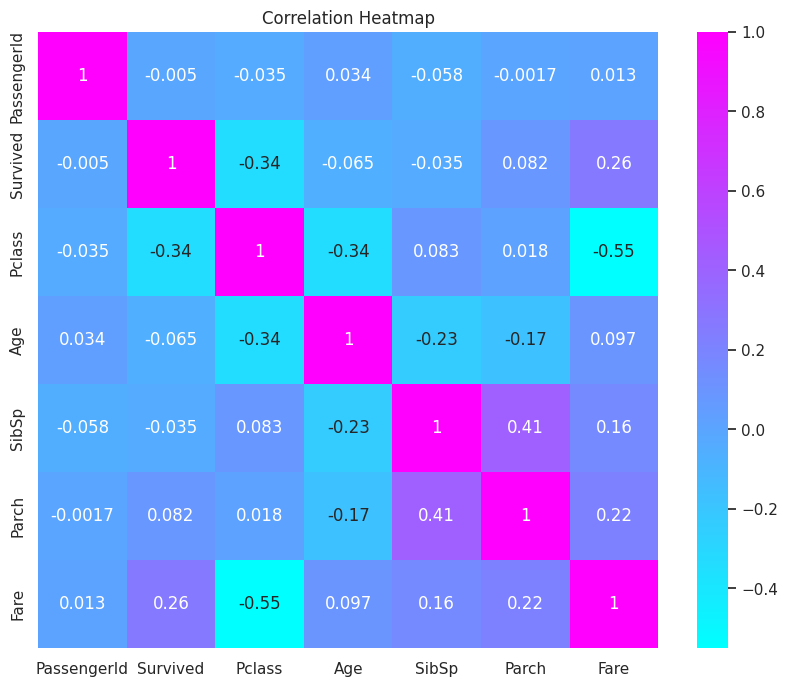

In [18]:
# Bivariate Analysis
## Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='cool')
plt.title('Correlation Heatmap')
plt.show()

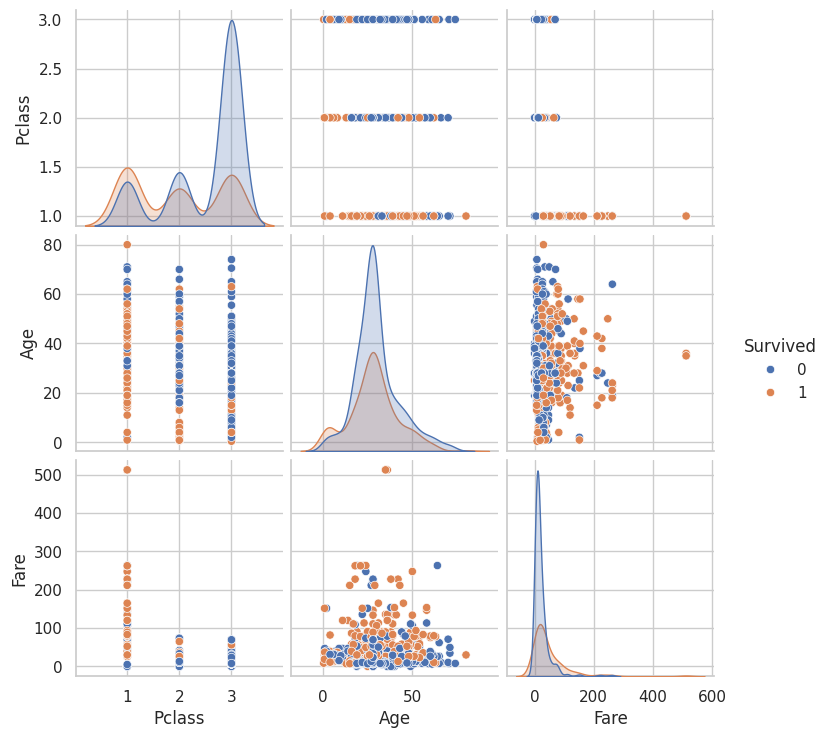

In [19]:
## Pairplot
sns.pairplot(df[['Survived','Pclass','Sex','Age','Fare']], hue='Survived')
plt.show()

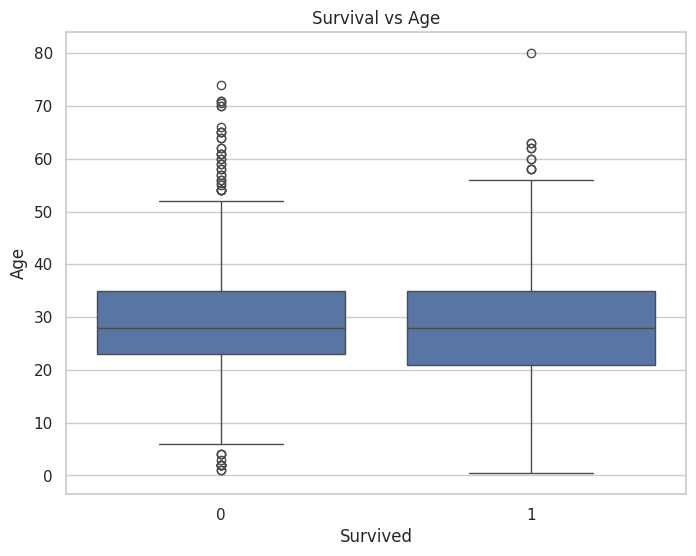

In [20]:
## Boxplots
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survival vs Age')
plt.show()

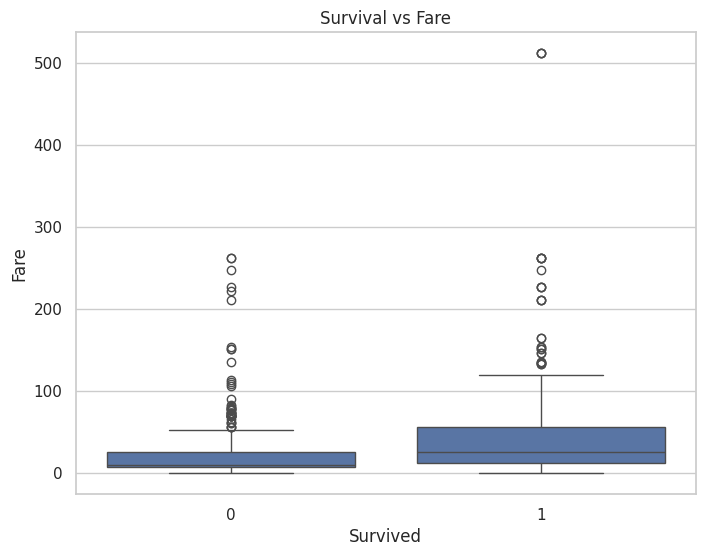

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Survival vs Fare')
plt.show()

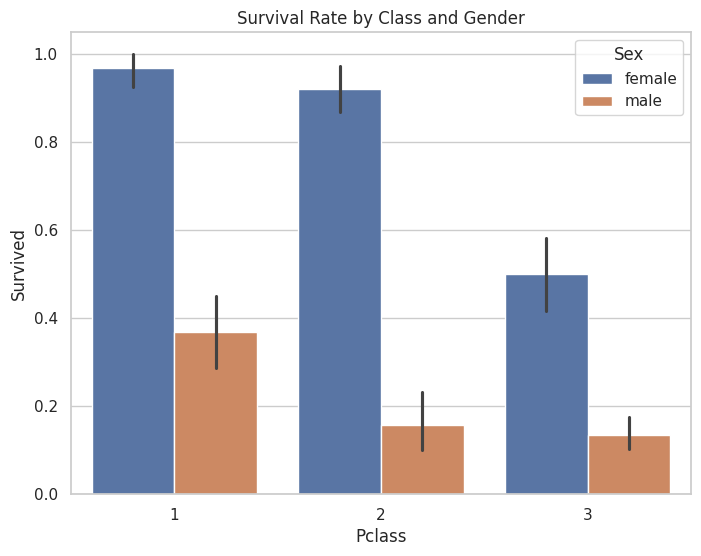

In [22]:
# Multivariate Analysis
## Survival based on Sex and Pclass
plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Class and Gender')
plt.show()

In [23]:
# Observations
print("""
Observations:
1. Higher survival rate among females compared to males.
2. Passengers in 1st class had higher chances of survival.
3. Younger passengers had slightly better survival rates.
4. Fare is positively correlated with survival (richer people survived more).
5. Most passengers embarked from 'S' port.
""")


Observations:
1. Higher survival rate among females compared to males.
2. Passengers in 1st class had higher chances of survival.
3. Younger passengers had slightly better survival rates.
4. Fare is positively correlated with survival (richer people survived more).
5. Most passengers embarked from 'S' port.



In [24]:
# Final Summary
print("""
Summary:
The EDA of the Titanic dataset revealed clear patterns: gender, passenger class, and fare paid significantly influenced survival chances.
Females and first-class passengers had higher survival rates. Age showed a trend where younger passengers survived more often.
Further modeling could help predict survival based on these features.
""")



Summary:
The EDA of the Titanic dataset revealed clear patterns: gender, passenger class, and fare paid significantly influenced survival chances. 
Females and first-class passengers had higher survival rates. Age showed a trend where younger passengers survived more often. 
Further modeling could help predict survival based on these features.

